In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NVDA.csv")

In [ ]:
df[["Date","Close"]].plot(x="Date", y="Close")
plt.xticks(rotation = 60)
plt.show()

Verdigraf for verdi av én NVIDIA aksje når markedet stengte for dagen
Dekker verdien fra 22.01.1999 frem til 23.11.2022, nyere data er ikke inkludert

In [ ]:
df["Change"] = df["Close"] - df["Open"]
df[["Date","Change"]].plot(x="Date", y="Change")
plt.xticks(rotation=60)
plt.show()

Lagde en ny kolonne som viser den gjennomsnittlige økningen/minkingen av verdien mellom når markedet åpnet og stengte på én dag

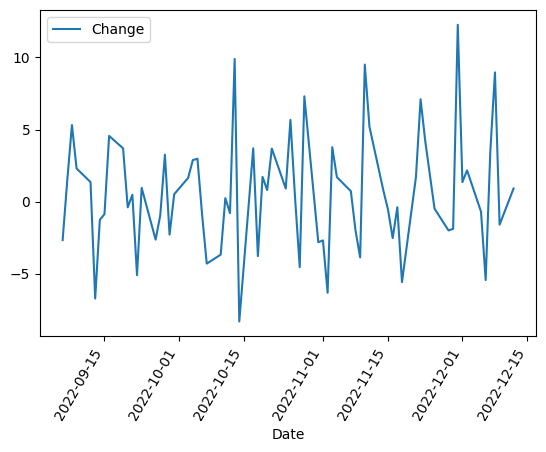

In [67]:
from datetime import datetime
import time

df["Date"] = pd.to_datetime(df["Date"])
df["Time_until_end"] = pd.Timestamp.now() - df["Date"] 

def print_last_n_days(days, focus):
    recent = df[["Date",focus,"Time_until_end"]]
    recent = recent[ recent["Time_until_end"] < pd.Timedelta(days=(pd.Timestamp.now() - df["Date"].iloc[-1]).days + days)]
    recent[["Date", focus]].plot(x="Date",y=focus)

    plt.xticks(rotation=60)
    plt.show()

print_last_n_days(100,"Change")



Zoomer inn på de siste n dagene i datasettet, med fokus på én enkelt verdi, her "Change"

In [ ]:
df["ChangePercentage"] = (df["Close"] - df["Open"]) / df["Open"] + 1
df[["ChangePercentage", "Date"]].plot(x="Date",y="ChangePercentage")

plt.show()

C:\Users\hansd\AppData\Local\Temp\ipykernel_9572\3882151844.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.35302156236885' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,"Cash"] = cash


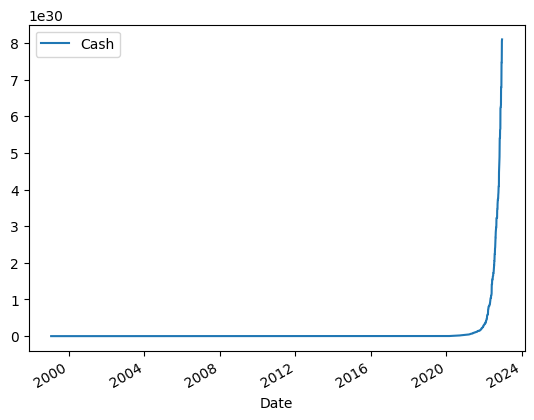

In [74]:
cash = 100

df["Value open"] = 0
df["Value close"] = 0

df["Stock amount"] = 0
df["Cash"] = 0

isHolding = False

for i in range(len(df)):
    if(df["Change"].iloc[i] > 0):
        cash = cash * df["ChangePercentage"].iloc[i]
    df.loc[i,"Cash"] = cash

df[["Cash","Date"]].plot(x="Date",y="Cash")
plt.show()

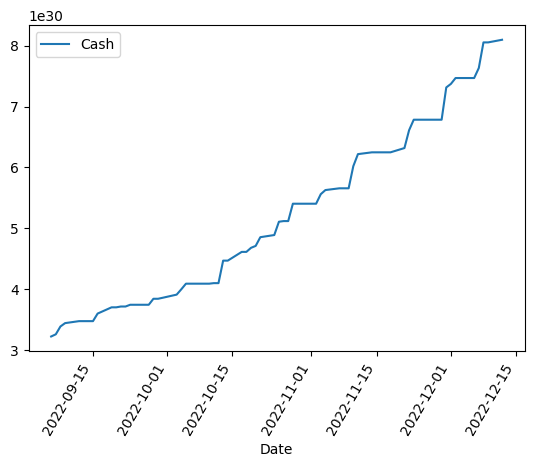

6012    8.097110e+30
Name: Cash, dtype: float64


In [70]:
print_last_n_days(100,"Cash")
print(df["Cash"].tail(1))